# Oasis Infobyte 
# Data Science Internship
# Name : Vora Gautam Kalyanbhai
# Task 4 : EMAIL SPAM DETECTION WITH MACHINE LEARNING

# Loading Packages and Libraries

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

# Loading Dataset

In [66]:
df=pd.read_csv("C:\\Users\\A\\Oasis Infobyte\\spam.csv",encoding="ISO-8859-1", engine="python")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [67]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [68]:
df.shape

(5572, 5)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# Data Preprocessing

In [70]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [71]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [72]:
df.replace({'target':{'ham':0,'spam':1}},inplace=True)
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [73]:
df.duplicated().sum()

403

In [74]:
df.shape

(5572, 2)

# Data Visualisation

In [75]:
df['length']=df.text.apply(len)
df.head()

,target,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


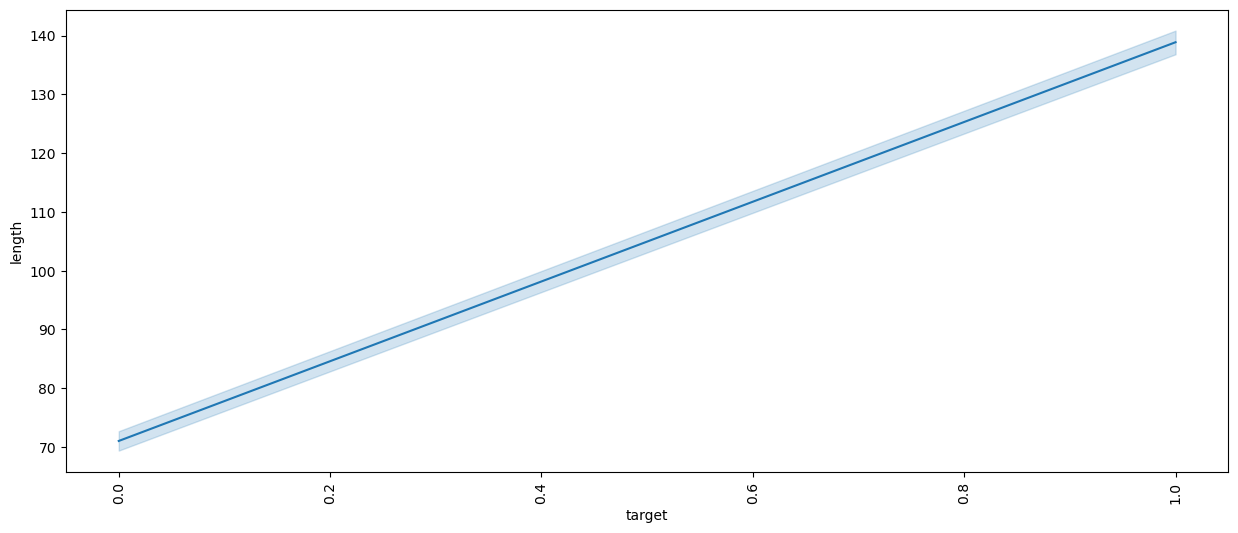

In [76]:
plt.figure(figsize=(15,6))
sns.lineplot(x=df['target'],y=df['length'],data=df,palette='his')
plt.xticks(rotation=90)
plt.show()

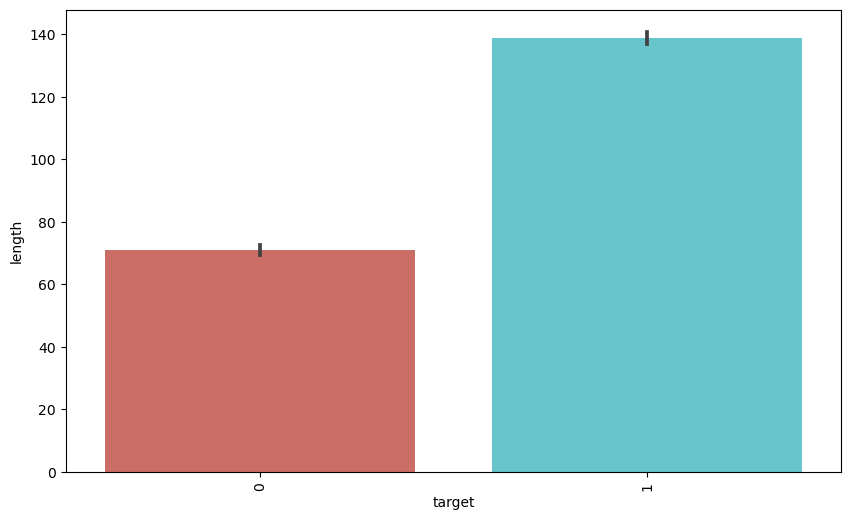

In [77]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['target'],y=df['length'],data=df,palette='hls')
plt.xticks(rotation=90)
plt.show()

AttributeError: 'tuple' object has no attribute 'set'

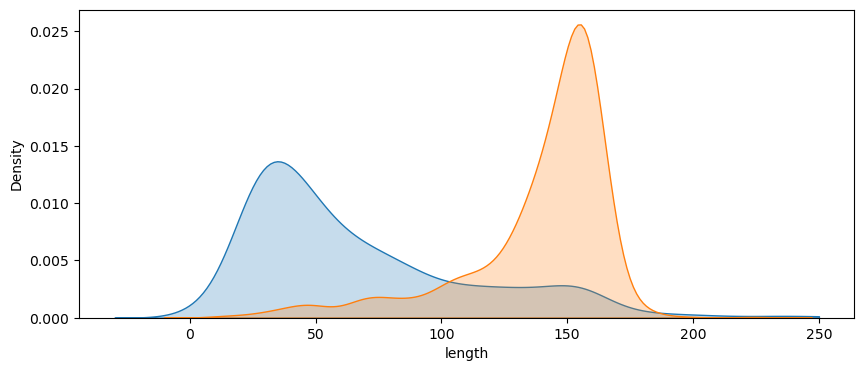

In [78]:
ax=plt.subplots(figsize=(10,4))
sns.kdeplot(df.loc[df.target==0,"length"],shade=True,label="Ham",clip=(-50,250))
sns.kdeplot(df.loc[df.target==1,"length"],shade=True,label="Spam")
ax.set(xlabel="Length",ylabel="Density",title="Length of Messeges")
ax.legend(loc="upper right")
plt.show()

# Spliting The Data

In [79]:
x=df['text']
x.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: text, dtype: object

In [80]:
y=df["target"]
y.head()

0    0
1    0
2    1
3    0
4    0
Name: target, dtype: int64

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
trainCV=cv.fit_transform(x_train)
testCV=cv.transform(x_test)

# Performing Support Vector Machine

In [83]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier_svm_linear=SVC(kernel='linear')
classifier_svm_linear.fit(trainCV,y_train)
pred_svm_linear=classifier_svm_linear.predict(testCV)

In [84]:
Accuracy_Score_SVM_Linear=accuracy_score(y_test,pred_svm_linear)
Accuracy_Score_SVM_Linear

0.9811659192825112

In [91]:
print("Support Vector Machine Linear=",Accuracy_Score_SVM_Linear)

Support Vector Machine Linear= 0.9811659192825112


# Performing Decision Tree Classifier

In [98]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt=DecisionTreeClassifier()
classifier_dt.fit(trainCV,y_train)
pred_dt=classifier_dt.predict(testCV)

In [99]:
Accuracy_Score_dt=accuracy_score(y_test,pred_dt)
Accuracy_Score_dt

0.9641255605381166

In [100]:
print("Decision Tree Classifier=",Accuracy_Score_dt)

Decision Tree Classifier= 0.9641255605381166


# Thank You!